In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

----------------------
## Question 1-A
----------------------

In [2]:
df = pd.read_csv('data.csv')
df

,id,weight,sweetness,label
0,1,180,7,Apple
1,2,200,6,Apple
2,3,150,4,Orange
3,4,170,5,Orange
4,5,160,6,Apple
5,6,140,3,Orange


In [11]:
from math import sqrt

def knn_predict(df, weight, sweetness, k=3, metric='euclidean'):
    df = df.copy()
    weight /= df['weight'].max()
    sweetness /= df['sweetness'].max()
    df['weight'] /= df['weight'].max()
    df['sweetness'] /= df['sweetness'].max()
    df['distance'] = df.apply(lambda x: sqrt((x.weight - weight)**2 + (x.sweetness - sweetness)**2), axis=1)
    
    df.sort_values(by='distance', inplace=True)
    df.reset_index(drop=True, inplace=True)
    print(df.head(10))
    return df.loc[:k-1, 'label'].value_counts(sort=True, ascending=False).index[0]

knn_predict(df, 165, 5.5, k=3)

   id  weight  sweetness   label  distance
0   5    0.80   0.857143   Apple  0.075677
1   4    0.85   0.714286  Orange  0.075677
2   2    1.00   0.857143   Apple  0.189016
3   3    0.75   0.571429  Orange  0.227032
4   1    0.90   1.000000   Apple  0.227032
5   6    0.70   0.428571  Orange  0.378386


'Apple'

In [ ]:
df

Decision Boundary for K = 3:


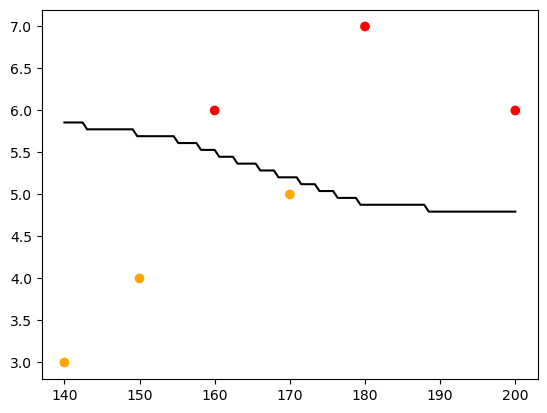

In [6]:
k = 3

color_map = {'Apple': 'red',
             'Orange': 'orange'}

weight_min, weight_max = int(df.weight.min()), int(df.weight.max())
sweetness_min, sweetness_max = int(df.sweetness.min()), int(df.sweetness.max())

boundary = []
# (weight_max - weight_min) // 100 + 1   (sweetness_max - sweetness_min) // 100 + 1

prev_label = None

for i in np.linspace(weight_min, weight_max, 100):
    prev_label = None
    for j in np.linspace(sweetness_min, sweetness_max, 50):
        cur_label = knn_predict(df, i, j, k=k)
        if prev_label is not None and prev_label != cur_label:
            boundary.append([i, j])
        prev_label = cur_label
            
w = [i[0] for i in boundary]
s = [i[1] for i in boundary]
            
fig = plt.figure()
plt.scatter(df.weight, df.sweetness, c=df.label.map(color_map))
# plt.scatter(165, 5.5)

plt.plot(w, s, 'black')

print(f'Decision Boundary for K = {k}:')

plt.show()

----------------------
## Question 1-B
----------------------

In [12]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(df[['weight', 'sweetness']], df.label)

model.predict([[165, 5.5]])

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Orange'], dtype=object)


Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Oran

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orang

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange
Orange

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Ap

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Ap

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Ap

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
App

/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
Apple
[]
Decision Boundary for K = 3:


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was

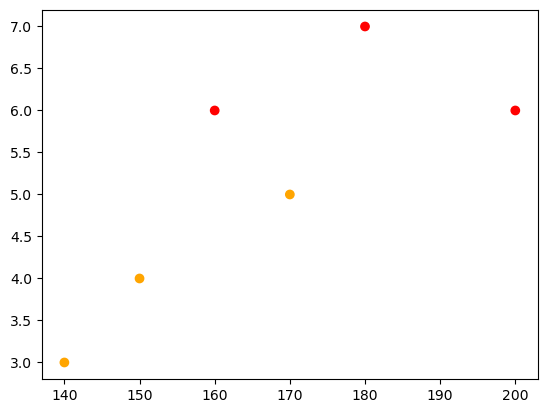

In [18]:
k = 3

color_map = {'Apple': 'red',
             'Orange': 'orange'}

weight_min, weight_max = int(df.weight.min()), int(df.weight.max())
sweetness_min, sweetness_max = int(df.sweetness.min()), int(df.sweetness.max())

boundary = []
# (weight_max - weight_min) // 100 + 1   (sweetness_max - sweetness_min) // 100 + 1

prev_label = None

for i in np.linspace(weight_min, weight_max, 100):
    prev_label = None
    print()
    for j in np.linspace(sweetness_min, sweetness_max, 100):
        cur_label = model.predict([[i, j]])[0]
        print(cur_label)
        if prev_label is not None and prev_label != cur_label:
            boundary.append([i, j])
        prev_label = cur_label
            
w = [i[0] for i in boundary]
s = [i[1] for i in boundary]
            
fig = plt.figure()
plt.scatter(df.weight, df.sweetness, c=df.label.map(color_map))
# plt.scatter(165, 5.5)

plt.plot(w, s, 'black')
print(boundary)

print(f'Decision Boundary for K = {k}:')

plt.show()

----------------------
## Question 2-A
----------------------

In [32]:
df = pd.read_csv('medical_data.csv')
df.head(20)

,id,age,bp,cholesterol,diagnosis
0,1,30,High,High,Sick
1,2,45,Low,Normal,Healthy
2,3,50,High,High,Sick
3,4,35,Low,Normal,Healthy
4,5,60,High,High,Sick
5,6,55,Low,Normal,Healthy
6,7,40,High,High,Sick
7,8,25,Low,Normal,Healthy
8,9,65,High,High,Sick
9,10,45,Low,Normal,Healthy


In [41]:
def calc_entropy(df, target_col):
    total = len(df)
    vals = df[target_col].value_counts()
    entropy = 0
    for val in vals:
        entropy += (val / total) * np.log(val / total)
    entropy *= -1
    return entropy

def calc_info_gain(df, predictor_col, target_col):
    total = len(df)
    initial_entropy = calc_entropy(df, target_col)
    cats = df[predictor_col].value_counts()
    entropy_after_split = 0
    for cat in cats.index:
        entropy_after_split += (cats[cat] / total) * calc_entropy(df[df[predictor_col] == cat], target_col)
        
    return initial_entropy - entropy_after_split
    
calc_info_gain(df, 'bp', 'diagnosis')

0.6931471805599453

In [42]:
for col in ['age', 'bp', 'cholesterol']:
    gain = calc_info_gain(df, col, 'diagnosis')
    print(f"Information Gain for column {col}: {gain}")

Information Gain for column age: 0.6931471805599453
Information Gain for column bp: 0.6931471805599453
Information Gain for column cholesterol: 0.6931471805599453
